# Assignment: Linear Models
## Do two questions in total: "Q1+Q2" or "Q1+Q3"
### `! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is 
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

#1-5 are 

In [ ]:
# Q6 with C = [ S(yi*zi1), S(yi*zi2) ]^T

# Divide by N:
# [ (1/N)S(zi1^2)   (1/N)S(zi1*zi2) ] [b1] = [ (1/N)S(yi*zi1) ]
# [ (1/N)S(zi1*zi2) (1/N)S(zi2^2)   ] [b2]   [ (1/N)S(yi*zi2) ]

# Using z_ij = x_ij - m_j and centering:
# (1/N)S(zi1^2)   = Var(x1)
# (1/N)S(zi2^2)   = Var(x2)
# (1/N)S(zi1*zi2) = Cov(x1, x2)
# (1/N)S(yi*zi1)  = Cov(x1, y)
# (1/N)S(yi*zi2)  = Cov(x2, y)

# Covariance-form normal equations:
# [[ Var(x1),   Cov(x1,x2) ],
#  [ Cov(x1,x2), Var(x2)   ]] [b1, b2]^T
#   = [ Cov(x1,y), Cov(x2,y) ]^T

#Matrix A captures how the predictors relate to each other (their variances and shared covariance).
#Vector C captures how each predictor relates to y.
#Solving A b = C gives the weights that combine the predictors to predict y while accounting for their overlap so each coefficient reflects a predictor’s contribution after controlling for the other.

**Q3.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

In [9]:
1. 
import pandas as pd
import pandas as pd
df = pd.read_csv(Path("data") / "heart_hw.csv")

p_by_group = df.groupby("transplant")["y"].mean()
p_control   = float(p_by_group["control"])
p_treatment = float(p_by_group["treatment"])
result = p_treatment - p_control
print("p_control   =", p_control)
print("p_treatment =", p_treatment)
print("result",  result)


p_control   = 0.11764705882352941
p_treatment = 0.34782608695652173
result 0.23017902813299232


In [16]:
import pandas as pd
import statsmodels.api as sm
# binary dummy variable for transplant
#1 if treatment 
#2 if control
df['transplant_dummy'] = (df['transplant'] == 'treatment').astype(int)
X = sm.add_constant(df['transplant_dummy'])
y = df['y']


# Fit the linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     6.354
Date:                Sun, 05 Oct 2025   Prob (F-statistic):             0.0133
Time:                        00:07:03   Log-Likelihood:                -59.591
No. Observations:                 103   AIC:                             123.2
Df Residuals:                     101   BIC:                             128.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1176      0.075  

The regression intercept and coefficient directly correspond to the group means and their difference, just as calculated in part 1. This is explained because the intercept from the regression represents the survival rate in the control group, while the coefficient on the transplant variable represents the difference in survival rates between the treatment and control groups, which is the average treatment effect

In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression


df['transplant_dummy'] = (df['transplant'] == 'treatment').astype(int)
X = df[['transplant_dummy', 'age']]
y = df['y']

model = LinearRegression()
model.fit(X, y)
print("Intercept:", model.intercept_)
print("Transplant coefficient:", model.coef_[0])
print("Age coefficient:", model.coef_[1])



Intercept: 0.7019569721740947
Transplant coefficient: 0.2647016865036751
Age coefficient: -0.013607217160218647
Intercept (control at mean age): 0.09452022942957691


Including age in the regression changes the interpretation of the intercept where it now represents the predicted survival probability for a control group patient of age zero and the coefficients show the adjusted effects of transplant and age on survival probability, with older age decreasing and transplant increasing the chance of survival.

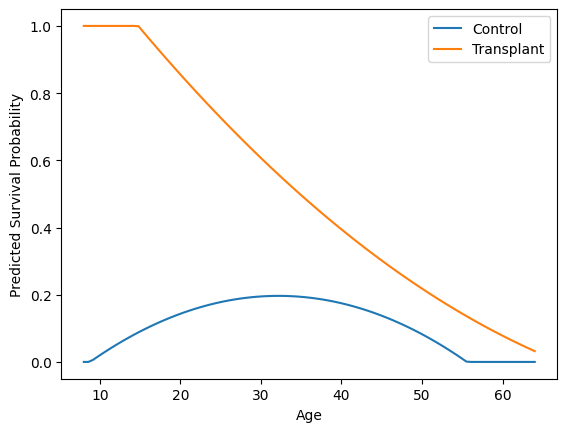

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



df['t'] = (df['transplant'] == 'treatment').astype(int)

#new columns to analyze
df['age2'] =df['age'] ** 2
df['age_t'] =df['age'] * df['t']
df['age2_t'] =df['age2'] * df['t']

X = df[['t','age','age2','age_t','age2_t']]
y = df['y']

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

# Predict for a range of ages
ages = np.linspace(df['age'].min(), df['age'].max(), 100)
ctrl = pd.DataFrame({'t':0, 'age':ages, 'age2':ages**2, 'age_t':0, 'age2_t':0})
treat = pd.DataFrame({'t':1, 'age':ages, 'age2':ages**2, 'age_t':ages, 'age2_t':ages**2})
pred_ctrl = model.predict(ctrl)
pred_treat = model.predict(treat)

# just for plot
pred_ctrl = np.clip(pred_ctrl, 0, 1)
pred_treat = np.clip(pred_treat, 0, 1)

# Plot
plt.plot(ages, pred_ctrl, label='Control')
plt.plot(ages, pred_treat, label='Transplant')
plt.xlabel('Age')
plt.ylabel('Predicted Survival Probability')
plt.legend()
plt.show()





I used a simple linear model to predict 3 year survival using treatment, age, age², and their interactions. I split the data 70/30 into train and test, trained on the train set, then predicted survival across ages for control and transplant. The plot shows survival dropping as age increases. The transplant curve is higher than control for most ages, meaning higher predicted survival with a transplant, and the gap gets smaller at older ages. Predictions were clipped to 0–1 just for the plot.

Using models to allocate organ transplants raises serious concerns about fairness, transparency, and bias. these models can also be wrong more often for smaller groups and may give probabilities that aren’t accurate. If such a tool is used, it should be simple to understand and checked often for fairness/accuracy and doctors should be able to override it with clear reasons.